<a href="https://colab.research.google.com/github/rajagopalmotivate/DeepLearningforSocietal/blob/main/Lab%203%20Contest%20My%20first%20experiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  objectives 
# 1. How to code end to end Deep Learning project 
# 2. How to code with Dense or convnet
# 3. Find out : What happens if you remove activation layers 


**Author:** [fchollet](https://twitter.com/fchollet)<br>
**Date created:** 2015/06/19<br>
**Last modified:** 2020/04/21<br>
**Description:** A simple convnet that achieves ~99% test accuracy on MNIST.

## Setup

In [36]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

## Prepare the data

In [37]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

4431872/4422102 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


## Build the model

In [38]:
model1 = keras.Sequential(
    [
        keras.Input(shape=input_shape),

        layers.Dense(64, activation='relu'),
        layers.Flatten(),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

In [86]:
model2 = keras.Sequential(
    [
        keras.Input(shape=input_shape),

        layers.Dense(64, activation='relu'),
             layers.BatchNormalization(),


        layers.Dense(32, activation='relu'),
             layers.BatchNormalization(),

        layers.Dense(32, activation='relu'),
        layers.Dense(32, activation='relu'),
                  layers.Dropout(0.5),

        layers.Dense(32, activation='relu'),
        layers.Flatten(),
        layers.Dense(32, activation='relu'),
             layers.BatchNormalization(),

       
                  layers.Dropout(0.5),

        layers.Dense(32, activation='relu'),

     
             layers.BatchNormalization(),

        layers.Dense(32, activation='relu'),

        layers.Dense(32, activation='relu'),     
             layers.BatchNormalization(),
             layers.Dropout(0.5),

        layers.Dense(num_classes, activation="softmax"),
    ]
)

In [59]:
model3 = keras.Sequential(
    [
        keras.Input(shape=input_shape),

        layers.Dense(64, activation='relu'),
        layers.Flatten(),
        layers.Dense(32, activation='relu'),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

In [60]:
model4 = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3) ),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3) ),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

In [61]:
model5 = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)


# Excersise: Choose one of the models to explore

In [62]:
model = model2

In [87]:


model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_69 (Dense)            (None, 28, 28, 64)        128       
                                                                 
 flatten_15 (Flatten)        (None, 50176)             0         
                                                                 
 dense_70 (Dense)            (None, 32)                1605664   
                                                                 
 dense_71 (Dense)            (None, 32)                1056      
                                                                 
 dense_72 (Dense)            (None, 32)                1056      
                                                                 
 dense_73 (Dense)            (None, 32)                1056      
                                                                 
 dense_74 (Dense)            (None, 32)              

In [64]:
import tensorflow as tf
 

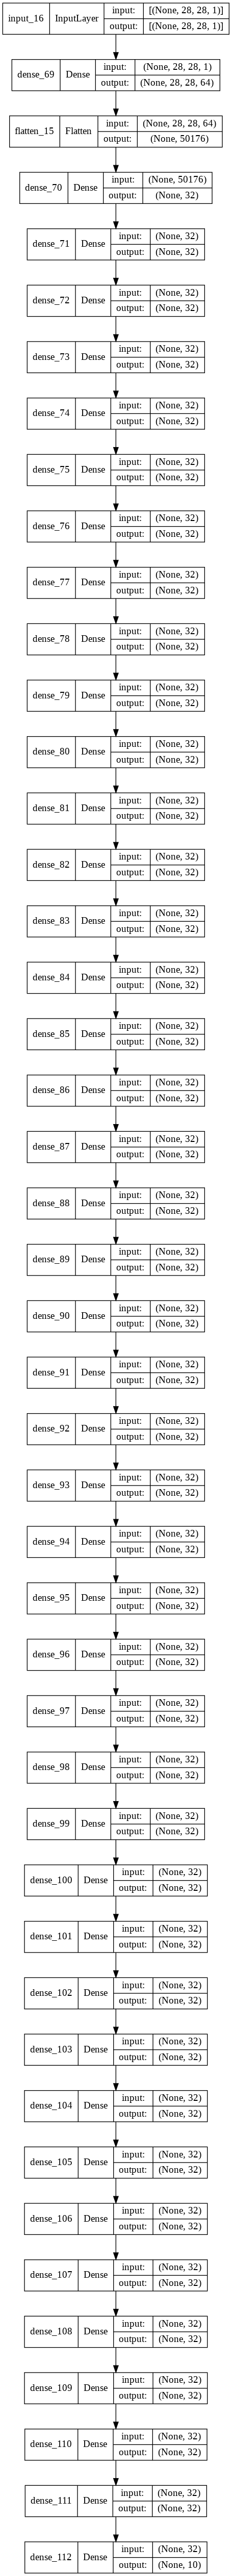

In [65]:
tf.keras.utils.plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

## Train the model

In [ ]:
batch_size = 128
epochs = 20

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

log = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.3)

Epoch 1/20
329/329 [==============================] - 11s 25ms/step - loss: 2.3027 - accuracy: 0.0986 - val_loss: 2.3028 - val_accuracy: 0.0971
Epoch 2/20
329/329 [==============================] - 8s 23ms/step - loss: 2.3026 - accuracy: 0.0978 - val_loss: 2.3028 - val_accuracy: 0.0971


In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Retrieve a list of accuracy results on training and test data
# sets for each training epoch

history = log

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Retrieve a list of list results on training and test data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc, 'C1', label='Training')
plt.plot(epochs, val_acc, 'C0', label='Validation')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()



In [ ]:
# Plot training and validation loss per epoch
plt.plot(epochs, loss,  'C1', label='Training loss')
plt.plot(epochs, val_loss , 'C0', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.figure()



## Evaluate the trained model

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

In [ ]:
print("Test accuracy in percentage:", score[1] * 100)

# Predict for a single image (and compare with the ground truth)


In [ ]:
predictions = model.predict(x_test[0:1])

In [ ]:
predictions

In [ ]:
y_test[0:1]

In [ ]:
predictions.argmax()

In [ ]:
y_test[0:1].argmax()